In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
from transformers import pipeline

In [ ]:
pipe("I have a problem with my iphone that needs to be resolved asap!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5227572321891785,
  0.45814111828804016,
  0.014264623634517193,
  0.002685008803382516,
  0.002152056200429797]}

In [ ]:
review = """I've been here a handful of times and every time I've been the service has been subpar. \
          They're not very friendly, they don't let you taste any of their beers on tap, and they hovered around our table at 11pm on a \
          Friday night so that we would hurry up and finish our pitcher that they let us buy only a few minutes before. \
          This past time I decided to try the mac n cheese because I heard it was amazing. It was not. \
          It was greasy, and the presentation looked like it had been put together haphazardly. \
          I ordered it with asparagus, tomatoes and mushrooms, and the asparagus were the tiniest species of asparagus I've ever seen, \
          and there was maybe a small handful of mushrooms. I also ordered a cocktail with soda, and the soda was completely flat.\
          I would have normally asked for a new/different drink but knowing how the service is I knew I wasn't going to get anything better.\
          Finally, everything is overpriced - drinks and food. The only thing nice about the place is the outdoor patio, but there are plenty of other \
          places in Santa Barbara with outdoor patios where I'd rather spend my money. I will never be going back here. (And still haven't as of May 2015!)"""


labels = ['Food Quality', 'Service', 'Menu', 'Atmosphere', 'Wait time', 'Price']

pipe(review,candidate_labels=labels)

{'sequence': "I've been here a handful of times and every time I've been the service has been subpar.           They're not very friendly, they don't let you taste any of their beers on tap, and they hovered around our table at 11pm on a           Friday night so that we would hurry up and finish our pitcher that they let us buy only a few minutes before. \\ \n          This past time I decided to try the mac n cheese because I heard it was amazing. It was not.           It was greasy, and the presentation looked like it had been put together haphazardly.           I ordered it with asparagus, tomatoes and mushrooms, and the asparagus were the tiniest species of asparagus I've ever seen,           and there was maybe a small handful of mushrooms. I also ordered a cocktail with soda, and the soda was completely flat.          I would have normally asked for a new/different drink but knowing how the service is I knew I wasn't going to get anything better.          Finally, everything is 

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039184 sha256=d10eed323489255770c8683d677be6fe0d8214f0

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_reviews = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_review_data.json", lines=True)

In [ ]:
df_business = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_business_data.json", lines=True)

In [ ]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
business_categories = df_business['categories'].unique()
for category in business_categories:
  print(category)

## Filtering data initial try

In [ ]:
def business_review_extractor(business_type, business_df, reviews_df):

  filtered_business = business_df[business_df['categories'].str.contains(business_type, case=False, na=False)]
  business_ids = list(filtered_business['business_id'])
  review_ids = list(reviews_df['business_id'])
  business_with_reviews = [item for item in business_ids if item in review_ids]

  df1 = reviews_df[['business_id', 'text']]
  mask = df1['business_id'].isin(business_with_reviews)
  filtered_reviews = df1[mask]

  result = pd.merge(filtered_business, filtered_reviews, on='business_id', how='inner')
  result.to_excel(f"{business_type}_reviews.xlsx", index=False)



In [ ]:
business_review_extractor('Gym', df_business, df_reviews)

In [ ]:
business_review_extractor('Department Stores', df_business, df_reviews)

In [ ]:
business_review_extractor('Health & Medical', df_business, df_reviews)

In [ ]:
business_review_extractor('Real Estate', df_business, df_reviews)

In [ ]:
business_review_extractor('Restaurants', df_business, df_reviews)

In [ ]:
df = pd.read_excel("/content/Restaurants_reviews.xlsx")

In [ ]:
reviews_1000 = df['text'][:1000]

In [ ]:
type(reviews_1000)

In [ ]:
with open("reviews_1000.txt", "w") as f:
  for review in reviews_1000:
    f.write(review)


## Filtering data efficient method

In [ ]:
reviews1 = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_review_data.json", lines=True)
reviews2 = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_data2M.json", lines=True)
reviews3 = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_data2M.json", lines=True)
reviews4 = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_data2M.json", lines=True)
reviews5 = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_data2M.json", lines=True)
reviews6 = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_data2M.json", lines=True)
reviews7 = pd.read_json("/content/drive/MyDrive/ISE540/Project/yelp_data2M.json", lines=True)

In [ ]:
reviews = pd.concat([reviews1, reviews2, reviews3, reviews4, reviews5, reviews6, reviews7])

In [ ]:
business_reviews_merged = pd.merge(df_business, reviews, on='business_id', how='inner')

In [ ]:
temp = business_reviews_merged[[business_reviews_merged['star_x'] == 5] and [business_reviews_merged['review_count']>7]]

In [ ]:
business_reviews_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,9vwYDBVI3ymdqcyJ5WW2Tg,e0imecnX_9MtLnS2rUZM-A,5,3,2,1,I've had acupuncture treatments with Abby over...,2012-05-02 18:07:38
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,OXgg1LdxHDv3CBU5-xi2lA,_Q0fdLVoTnlNkEypUvNkHA,5,1,0,0,Abby is an amazing practitioner. In a treatmen...,2013-03-01 06:11:05
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,DG64cjud9cWB4fANskVxSw,ycUooVIDWPgXPf6niW-FWQ,4,2,0,0,I went to see Abby for some digestive issues. ...,2013-01-17 00:05:43
3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,hzvRRb40oPttxAdyr7kfow,CiwVvb7jWijWB5jkmatzKA,5,0,1,0,"Abby helped me with some longstanding issues, ...",2015-03-16 03:43:08
4,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,xUkBPk-QfcW4i3MRU5TeXw,QkCbMKBktkrkOFJugHvY6w,5,0,0,0,"Recently, I referred a patient of mine with mu...",2013-03-05 18:45:07


In [ ]:
business_reviews_merged.shape

(7000000, 22)

In [ ]:
cols_with_missing_values = business_reviews_merged.columns[business_reviews_merged.isna().any()]
cols_with_missing_values

Index(['attributes', 'categories', 'hours'], dtype='object')

In [ ]:
categories = business_reviews_merged['categories'].fillna('')
categories = categories.unique()
len(categories)

28248

In [ ]:
restaurant_categories = []
for cat in categories:
  if "Restaurants" in cat:
    restaurant_categories.append(cat)

In [ ]:
len(restaurant_categories)

10451

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(restaurant_categories)
X.shape

(10451, 648)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


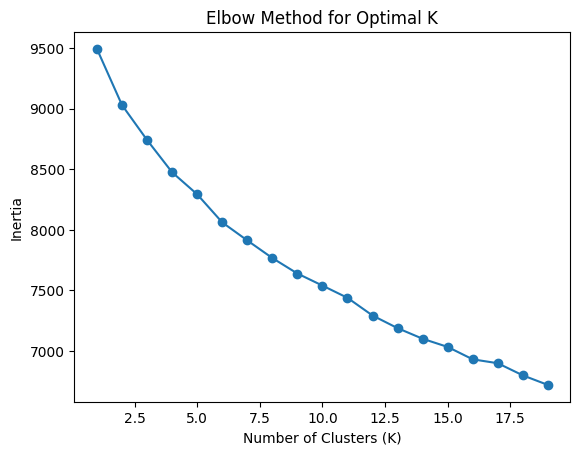

In [ ]:
inertias = []
K_range = range(1, 20)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
silhouette_scores = []
range_n_clusters = [2, 3, 5, 11, 13, 14]  # Define the range of cluster numbers

for n_clusters in range_n_clusters:
    # Initialize KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)  # X is your data

    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a subplot for each cluster number
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(8, 4)

    # The 1st subplot is the silhouette plot
    ax.set_xlim([-0.2, 1])
    ax.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with {} clusters".format(n_clusters)), fontsize=14, fontweight='bold')

# Display the silhouette scores for each K
plt.show()



In [ ]:
# Choose the number of clusters (K)
K = 14  # You can change this based on your analysis

# Create the K-means model
kmeans = KMeans(n_clusters=K, random_state=42)

# Fit the model to your TF-IDF data
kmeans.fit(X)

# Get cluster labels for each category
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Create a dictionary to store categories in each cluster
clusters = {i: [] for i in range(K)}

# Assign each category to a cluster
for i, label in enumerate(cluster_labels):
    clusters[label].append(restaurant_categories[i])

# Print the categories in each cluster
for cluster, category_list in clusters.items():
    print(f"Cluster {cluster + 1}:")
    print(f"cluster size: {len(category_list)}")
    for category in category_list[:10]:
        print(category)

    print()

Cluster 1:
cluster size: 1057
Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek
Cocktail Bars, Bars, Italian, Nightlife, Restaurants
Sports Bars, American (New), American (Traditional), Nightlife, Bars, Restaurants
Gastropubs, Cocktail Bars, Beer Bar, Bars, Restaurants, Nightlife
Seafood, Restaurants, Bars, Nightlife, Cocktail Bars, American (New), Pubs
American (Traditional), Bars, Nightlife, Sports Bars, Restaurants
American (Traditional), Sports Bars, Restaurants, Bars, Nightlife, Steakhouses, Salad, Beer Bar
Burgers, Sports Bars, Bars, Lounges, Restaurants, Salad, Wraps, Nightlife, American (New)
Bars, Lounges, American (New), Restaurants, Nightlife, Wine Bars
Cocktail Bars, Italian, Nightlife, Seafood, Bars, Restaurants

Cluster 2:
cluster size: 182
Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants
Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food
Ice Cream & Frozen Yogurt, Coffee & Tea, Restaurants, Sandwiches, Fo

In [ ]:
ca_businesses = business_reviews_merged[business_reviews_merged['state']=='CA']
ca_businesses.shape

(48079, 22)

In [ ]:
temp = ca_businesses['review_count'].value_counts()
temp = temp.to_dict()
temp = dict(sorted(temp.items()))
temp

{5: 226,
 6: 283,
 7: 260,
 8: 314,
 9: 294,
 10: 242,
 11: 199,
 12: 266,
 13: 213,
 14: 161,
 15: 167,
 16: 187,
 17: 179,
 18: 194,
 19: 115,
 20: 240,
 21: 273,
 22: 173,
 23: 165,
 24: 193,
 25: 89,
 26: 146,
 27: 155,
 28: 242,
 29: 213,
 30: 193,
 31: 82,
 32: 179,
 33: 183,
 34: 157,
 35: 139,
 36: 155,
 37: 131,
 38: 10,
 39: 106,
 40: 131,
 41: 235,
 42: 60,
 43: 194,
 44: 159,
 45: 226,
 46: 163,
 47: 128,
 48: 97,
 49: 125,
 50: 102,
 51: 126,
 52: 98,
 53: 169,
 54: 153,
 55: 60,
 56: 97,
 57: 237,
 58: 79,
 59: 17,
 60: 138,
 61: 105,
 62: 136,
 63: 205,
 64: 65,
 65: 71,
 66: 187,
 67: 67,
 68: 140,
 69: 128,
 70: 70,
 71: 72,
 72: 173,
 73: 30,
 74: 76,
 76: 184,
 77: 157,
 78: 119,
 79: 245,
 80: 80,
 82: 130,
 83: 86,
 84: 223,
 86: 264,
 87: 199,
 89: 55,
 91: 97,
 92: 60,
 93: 168,
 94: 111,
 95: 151,
 96: 227,
 97: 130,
 98: 141,
 100: 139,
 101: 159,
 102: 74,
 103: 59,
 105: 106,
 106: 168,
 108: 270,
 109: 291,
 110: 168,
 111: 113,
 113: 255,
 114: 121,
 115: 6

In [ ]:
ca_businesses = ca_businesses[ca_businesses['review_count'] > 10]
ca_businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
1324,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,...,"Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",nD9ug6O1rQQ_B6OuY5eitw,81CW8cGriSJM67-ZrijO-A,5,1,0,0,The people at the store amazing! We came in to...,2017-02-20 01:15:06
1325,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,...,"Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",ok15zpwBjImmf3KlSGUkJw,qPRY6ZGFDgWM-T7ByAlMJg,4,0,0,1,This is the best priced place for tank tops th...,2016-09-06 15:05:38
1326,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,...,"Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",Q3LfxYXMB_odT6HJRQdqkQ,b0ElohIhUZjNHrwvTtBtwA,4,1,0,1,Glad to have H&M in Santa Barbara. What an exc...,2011-08-25 09:42:43
1327,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,...,"Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",k0xQrwbjdb9DqoWSPmcG1g,HtPSa9IIR4q9bSSAcrbyIw,1,1,0,1,The staff of this H&M are some of the WORST re...,2015-09-12 23:46:16
1328,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,...,"Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",F4GX4w0lA0NwoOzd84kZZg,sP8-a_xDC8oo7EMQTRqJ3g,2,1,0,0,There could be no slower service in the histor...,2014-11-18 02:43:51


In [ ]:
ca_businesses.shape

(46460, 22)

In [ ]:
cols_with_missing_values = ca_businesses.columns[ca_businesses.isna().any()]
cols_with_missing_values

Index(['attributes', 'hours'], dtype='object')

In [ ]:
ca_restaurants = ca_businesses[ca_businesses['categories'].str.contains("Restaurants", case=False)]

In [ ]:
ca_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
3650,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,5,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47
3651,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",LFpaQzYkP5Pzm5lEjJpTRw,Ttb21DpWqphQMNSS5TXgMA,5,0,0,0,Possibly the best breakfast sandwich EVER. On...,2017-01-15 00:36:04
3652,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",Q3fPo_x6xKxafAzy1hFITg,ha2Lv7WnxvdYnRsqwL1apQ,4,0,0,0,Pricey ( a ham and cheese croissant was $5.50)...,2018-07-17 00:20:41
3653,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",_OmwsZRl7Qrz7S2T8mnlRg,OVLf6NVTi7noMP1qCKr76w,5,0,1,1,Are you kidding me? This is without a doubt so...,2018-01-09 20:44:47
3654,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",xinTYNBQflqAoKYBAztv2A,2ykh0_q0uMLFtypLDVSqlg,2,3,0,0,"Super slow service, ""salads"" are not very good...",2017-02-09 19:09:31


In [ ]:
ca_restaurants.shape

(28688, 22)

In [ ]:
unique_restaurants = ca_restaurants['business_id'].unique()
len(unique_restaurants)

193

## Cleaning the reviews and get length of reviews

In [ ]:
review = ca_restaurants['text'][3650]
review

'What a great addition to the Funk Zone!  Grab a bite, grab some tastings, life is good. Right next door to the Santa Barbara Wine Collective, in fact it actually shares the same tables.  We had a fabulous savory croissant.'

In [ ]:
def preprocess_text(text):
  # Remove punctuation and convert to lowercase
  text = text.translate(str.maketrans('', '', string.punctuation)).lower()
  # Tokenize the text
  tokens = word_tokenize(text)
  # Remove stopwords and lemmatize
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
  return (' '.join(tokens))

In [ ]:
clean_review = preprocess_text(review)
len(clean_review.split())

24

In [ ]:
ca_restaurants['clean_text'] = ca_restaurants['text'].apply(preprocess_text)
ca_restaurants.head()

<ipython-input-51-016a2e8c84a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_restaurants['clean_text'] = ca_restaurants['text'].apply(preprocess_text)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,clean_text
3650,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,5,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47,great addition funk zone grab bite grab tastin...
3651,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",LFpaQzYkP5Pzm5lEjJpTRw,Ttb21DpWqphQMNSS5TXgMA,5,0,0,0,Possibly the best breakfast sandwich EVER. On...,2017-01-15 00:36:04,possibly best breakfast sandwich ever biscuit ...
3652,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",Q3fPo_x6xKxafAzy1hFITg,ha2Lv7WnxvdYnRsqwL1apQ,4,0,0,0,Pricey ( a ham and cheese croissant was $5.50)...,2018-07-17 00:20:41,pricey ham cheese croissant 550 anywhere santa...
3653,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",_OmwsZRl7Qrz7S2T8mnlRg,OVLf6NVTi7noMP1qCKr76w,5,0,1,1,Are you kidding me? This is without a doubt so...,2018-01-09 20:44:47,kidding without doubt best food ive ever life ...
3654,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,...,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",xinTYNBQflqAoKYBAztv2A,2ykh0_q0uMLFtypLDVSqlg,2,3,0,0,"Super slow service, ""salads"" are not very good...",2017-02-09 19:09:31,super slow service salad good really priced wo...


In [ ]:
ca_restaurants['review_length'] = ca_restaurants['clean_text'].apply(lambda x: len(x.split()))

<ipython-input-54-b492d6a4d30a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_restaurants['review_length'] = ca_restaurants['clean_text'].apply(lambda x: len(x.split()))


## Getting the positive, negative and neutral reviews

In [ ]:
#filtering the reviews which are above 3 stars
ca_restaurants_positive = ca_restaurants[ca_restaurants['stars_y'] > 3]

#filter the reviews which are below 3 stars
ca_restaurants_negative = ca_restaurants[ca_restaurants['stars_y'] < 3]

#filter the reviews which are neutral (=3) stars
ca_restaurants_neutral = ca_restaurants[ca_restaurants['stars_y'] == 3]

In [ ]:
print(f"Number of positive reviews: {ca_restaurants_positive.shape[0]}")
print(f"Number of negative reviews: {ca_restaurants_negative.shape[0]}")
print(f"Number of neutral reviews: {ca_restaurants_neutral.shape[0]}")

Number of positive reviews: 20274
Number of negative reviews: 5254
Number of neutral reviews: 3160


In [ ]:
def preprocess_text(text_list):
  cleaned_text = []
  for text in text_list:
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    cleaned_text.append(' '.join(tokens))

  return cleaned_text

## Trying LDA on positive, negative and neutral reviews

In [ ]:
def topic_modeling(document):
  no_features = 1000
  no_topics = 5
  no_top_words = 10

  tf_vectorizer = CountVectorizer(max_features=no_features, stop_words='english')
  tf = tf_vectorizer.fit_transform(document)
  tf_feature_names = tf_vectorizer.get_feature_names_out()

  lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

  topic_lists = []
  for topic_idx, topic in enumerate(lda.components_):
    topic_list = [tf_feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_lists.append(topic_list)
    #print("Topic %d:" % (topic_idx))
    #print(" ".join([tf_feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

  return topic_lists


In [ ]:
def display_topics(topics_list):
  for idx, t_list in enumerate(topics_list):
    print(f"Topic {idx+1}: {t_list}")

In [ ]:
def transform_df(df):
  df_grouped = df.groupby('business_id')['text'].agg(list).reset_index()
  df_grouped['cleaned_text'] = df_grouped['text'].apply(preprocess_text)
  df_grouped['topic_lists'] = df_grouped['cleaned_text'].apply(topic_modeling)

  return df_grouped


In [ ]:
ca_rest_pos_grp = ca_restaurants_positive.groupby('business_id')['text'].agg(list).reset_index()
ca_rest_pos_grp['cleaned_text'] = ca_rest_pos_grp['text'].apply(preprocess_text)
ca_rest_pos_grp['topic_lists'] = ca_rest_pos_grp['cleaned_text'].apply(topic_modeling)
ca_rest_pos_grp

In [ ]:
ca_rest_pos_grp = transform_df(ca_restaurants_positive)
ca_rest_pos_grp

In [ ]:
# displaying the topics extracted for positive reviews for first 5 restaurants
for i in range(5):
  print(f"Restaurant {i+1}")
  display_topics(ca_rest_pos_grp['topic_lists'][i])
  print()

Restaurant 1
Topic 1: ['great', 'food', 'chase', 'place', 'service', 'restaurant', 'good', 'time', 'chicken', 'santa']
Topic 2: ['best', 'clam', 'chowder', 'waiter', 'manhattan', 'great', 'italian', 'barbara', 'santa', 'favorite']
Topic 3: ['delicious', 'food', 'perfect', 'place', 'great', 'cherry', 'love', 'kitchen', 'little', 'half']
Topic 4: ['great', 'place', 'food', 'service', 'cheese', 'loved', 'lunch', 'jonathan', 'drink', 'good']
Topic 5: ['calamari', 'happy', 'hour', 'appetizer', 'great', 'drink', 'chicken', 'good', 'bartender', 'day']

Restaurant 2
Topic 1: ['pizza', 'order', 'mizza', 'reply', 'make', 'menu', 'owner', 'received', 'place', 'crust']
Topic 2: ['pizza', 'good', 'place', 'mizza', 'large', 'happy', 'time', 'best', 'special', 'hour']
Topic 3: ['pizza', 'food', 'sauce', 'yum', 'white', 'chicken', 'love', 'wine', 'mizza', 'sb']
Topic 4: ['pizza', 'good', 'chicken', 'great', 'pasta', 'place', 'ive', 'ordered', 'time', 'delicious']
Topic 5: ['pizza', 'mizza', 'good', 'g

In [ ]:
ca_rest_neg_grp = transform_df(ca_restaurants_negative)
ca_rest_neg_grp

,business_id,text,cleaned_text,topic_lists
0,-3AooxIkg38UyUdlz5oXdw,[Horrible service. Our waiter never checked us...,[horrible service waiter never checked u flag ...,"[[food, like, price, waitress, ordered, servic..."
1,-Fka99c-tJ-epWYNIobqyQ,[The pizza is good. Great gluten free options....,[pizza good great gluten free option staff cha...,"[[cheese, sub, ask, good, meatball, star, mac,..."
2,-TArOdux8Z4oH-jIM1FJuQ,"[The waiter specifically suggested ""the salmon...",[waiter specifically suggested salmon dish dis...,"[[service, table, like, poached, food, water, ..."
3,-fxH1XplVLVtWg2ZJWwRdA,[A local told me it was just like Togos. NOT! ...,[local told like togo got turkey sandwich past...,"[[quality, better, bad, sandwich, local, sb, t..."
4,0jpFptAehZhLl3nkhHDanA,[Hotel rooms and ground are beautiful Food...,[hotel room ground beautiful food service one ...,"[[valet, parker, company, matter, insurance, g..."
...,...,...,...,...
178,ygZyTUWS4dbVL8d6vAiN4A,"[ghetto hole in the wall, the chips are not fr...",[ghetto hole wall chip free salsa bar nasty di...,"[[order, wrong, charge, went, tell, listen, ma..."
179,ywXa1pDqHPe9tOPx0yJFUg,[Some of the worst tacos I've ever had. They w...,[worst taco ive ever cold completely unappetiz...,"[[add, horrendous, locker, wearing, walking, u..."
180,zE8kXF0_2Twh4AhcewlFGw,[I picked this place based on yelp and was lef...,[picked place based yelp left disappointed ask...,"[[price, rolled, arigato, meant, really, fast,..."
181,zbrIMldF_O1ZQ0vpUaaa8A,[We were really looking forward to what the ne...,[really looking forward new lighthouse restaur...,"[[came, restaurant, food, waiter, place, serve..."


In [ ]:
# displaying the topics extracted for negative reviews for first 5 restaurants
for i in range(5):
  print(f"Restaurant {i+1}")
  display_topics(ca_rest_neg_grp['topic_lists'][i])
  print()

Restaurant 1
Topic 1: ['food', 'like', 'price', 'waitress', 'ordered', 'service', 'pasta', 'place', 'italian', 'chicken']
Topic 2: ['mask', 'food', 'time', 'right', 'sauce', 'restaurant', 'health', 'server', 'minute', 'bread']
Topic 3: ['food', 'order', 'restaurant', 'service', 'asked', 'came', 'table', 'drink', 'server', 'minute']
Topic 4: ['recommend', 'stale', 'pasta', 'calamari', 'like', 'food', 'bread', 'appetizer', 'vegan', 'steamed']
Topic 5: ['food', 'thirty', 'say', 'place', 'took', 'closed', 'restaurant', 'time', 'good', 'booked']

Restaurant 2
Topic 1: ['cheese', 'sub', 'ask', 'good', 'meatball', 'star', 'mac', 'inside', 'told', 'fresh']
Topic 2: ['walnut', 'said', 'gave', 'pizza', 'chicken', 'came', 'hour', 'dough', 'good', 'hungry']
Topic 3: ['pizza', 'time', 'place', 'ordered', 'food', 'good', 'service', 'order', 'cheese', 'like']
Topic 4: ['pizza', 'service', 'place', 'customer', 'review', 'business', 'food', 'mizza', 'quality', 'time']
Topic 5: ['vi', 'tog', 'det', 'som

In [ ]:
ca_rest_neu_grp = transform_df(ca_restaurants_neutral)
ca_rest_neu_grp

,business_id,text,cleaned_text,topic_lists
0,-3AooxIkg38UyUdlz5oXdw,[We stopped in for a quick bite for lunch time...,[stopped quick bite lunch time decor okit smal...,"[[ordered, good, sauce, salad, really, dessert..."
1,-Fka99c-tJ-epWYNIobqyQ,"[I know I know, silly as it seems, I have not ...",[know know silly seems pizza get tortilla soup...,"[[pizza, food, good, crust, order, time, said,..."
2,-TArOdux8Z4oH-jIM1FJuQ,[We enjoyed breakfast here this past Saturday....,[enjoyed breakfast past saturday many option q...,"[[1111, bistro, happy, know, time, drink, yelp..."
3,-fxH1XplVLVtWg2ZJWwRdA,[Why is it that the food that tasted so good d...,[food tasted good college taste good went loca...,"[[sandwich, good, 25, location, turkey, sam, p..."
4,0jpFptAehZhLl3nkhHDanA,[This review is just for the restaurant.\nWe h...,[review restaurant breakfast lunch dinner let ...,"[[salad, lunch, got, staff, wasnt, tea, good, ..."
...,...,...,...,...
175,ygZyTUWS4dbVL8d6vAiN4A,[Chile Relleno burrito soooo good!\nThis place...,[chile relleno burrito soooo good place little...,"[[lunch, rincon, taco, bit, 700, 135, today, f..."
176,ywXa1pDqHPe9tOPx0yJFUg,[All the food is pretty lack luster. Carne asa...,[food pretty lack luster carne asada fry le la...,"[[ask, point, leaf, ingredient, opened, dont, ..."
177,zE8kXF0_2Twh4AhcewlFGw,[The place is inside of the sandwich place The...,[place inside sandwich place three pickle surp...,"[[hot, 40, 10min, inside, drink, kind, miso, o..."
178,zbrIMldF_O1ZQ0vpUaaa8A,[Food and atmosphere was very good. Service w...,[food atmosphere good service slow worth going...,"[[restaurant, came, pretty, dinner, garlic, kn..."


In [ ]:
# displaying the topics extracted for neutral reviews for first 5 restaurants
for i in range(5):
  print(f"Restaurant {i+1}")
  display_topics(ca_rest_neu_grp['topic_lists'][i])
  print()

Restaurant 1
Topic 1: ['ordered', 'good', 'sauce', 'salad', 'really', 'dessert', 'cannoli', 'asked', 'restaurant', 'veal']
Topic 2: ['fry', 'nice', 'drop', 'plate', 'restaurant', 'price', 'way', 'lot', 'service', 'soft']
Topic 3: ['food', 'waitress', 'restaurant', 'chicken', 'look', 'pretty', 'great', 'party', 'place', 'overall']
Topic 4: ['food', 'extra', 'sauce', 'want', 'minute', 'ask', 'charge', 'sat', 'like', 'place']
Topic 5: ['food', 'restaurant', 'good', 'service', 'time', 'place', 'great', 'table', 'really', 'like']

Restaurant 2
Topic 1: ['pizza', 'food', 'good', 'crust', 'order', 'time', 'said', 'set', 'glutenfree', 'niece']
Topic 2: ['pizza', 'good', 'great', 'deal', 'place', 'kid', 'nice', 'little', 'time', 'service']
Topic 3: ['pizza', 'time', 'discount', 'told', 'hour', 'offered', 'food', 'happy', 'free', '750']
Topic 4: ['pizza', 'good', 'walnut', 'kid', 'chicken', 'large', 'like', 'medium', 'salad', 'time']
Topic 5: ['come', 'pizza', 'soup', 'food', 'good', 'im', 'pani

## Trying BERTopic

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.2 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

In [ ]:
pipe = pipeline(model="facebook/bart-large-mnli")


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ISE540/Project/sampled_data_5000.csv")

In [ ]:
reviews = list(df['Review'])

In [ ]:
topics_model = BERTopic()
topics, _ = topics_model.fit_transform(reviews)

In [ ]:
topics_model.visualize_topics()

In [ ]:
topics_model.visualize_barchart()